# Building a Machine Learning Model to Predict House Prices

In [1]:
#imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
#read in data
train= pd.read_csv("datasets/train.csv")
test= pd.read_csv("datasets/test.csv")

In [3]:
display(train.head())
display(train.shape)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


(2051, 81)

In [4]:
display(test.head())
display(test.shape)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


(878, 80)

ignore test data for now and use train for analysis

In [5]:
#check data info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [6]:
#Take a closer look at nulls
train.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [7]:
#drop columns where null values > 1000 i.e. where ~ 50% of observations are missing
train.drop(columns=['Alley','Fireplace Qu','Pool QC','Fence','Misc Feature'],inplace=True)
train.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Heating              0
Heating QC           0
Central Air          0
Electrical           0
1st Flr SF 

I sorted through data using the varable descriptions document, to identify variables of interest based on exisiting knowledge of key determinants of property values.

### Important stuff to keep in mind but remove after analysis:
- structural features of homes i.e. property size, number of bedrooms and bathrooms, 
- neighnourhood characteristics

For possible feature eng:
- lot shape
- land contour
- Land Slope (Ordinal)
- basement finishec sq ft relative to total sqft of basement area. Remember that basement sqft doesnt count towards gr lv sqft. 



**Variables of Interest**
- Lot Area (Continuous) 
- Lot Config (Nominal)
- Neighborhood (Nominal)
- Bldg Type (Nominal): Type of dwelling
- House Style (Nominal): Style of dwelling
- Overall Qual (Ordinal): Rates the overall material and finish of the house
- Overall Cond (Ordinal): Rates the overall condition of the house
- Year Built (Discrete): Original construction date
- Year Remod/Add (Discrete): Remodel date (same as construction date if no remodeling or additions)
- BsmtFin Type 1	(Ordinal): Rating of basement finished area
- Central Air (Nominal): Central air conditioning
- Gr Liv Area (Continuous): Above grade (ground) living area square feet
- Full Bath (Discrete): Full bathrooms above grade
- Half Bath (Discrete): Half baths above grade
- Bedroom (Discrete): Bedrooms above grade (does NOT include basement bedrooms)
- Kitchen (Discrete): Kitchens above grade
- KitchenQual (Ordinal): Kitchen quality
- TotRmsAbvGrd	(Discrete): Total rooms above grade (does not include bathrooms)
- Fireplaces (Discrete): Number of fireplaces
- Garage Cars (Discrete): Size of garage in car capacity
- Paved Drive (Ordinal): Paved driveway
- Sale Price
- Condition 1 (Nominal): Proximity to various conditions

Below is a broad categorization of the identified variables of interest:

A) Indicators of Property Size
- Lot Area
- Gr Liv Area
- Full Bath
- Half Bath
- Bedroom
- Kitchen Abv Gr
- TotRmsAbvGrd 
- Garage

B) Neighborhood Characteristics
- Neighborhood 
- Condition 1

C) Quality Indicators
- Overall Qual
- Overall Cond
- BsmtFin Type 1
- Kitchen Qual

D) Design Features
- Lot Config
- Building Type
- House style
- Central Air

E) Property Age
- Year Built
- Year remodeled
- Fire Place
- Paved Drive

In [9]:
# setting up dataframe with variables of interest
df = train[['Id','PID','Lot Area','Lot Config','Neighborhood','Condition 1','Bldg Type','House Style','Overall Qual',
            'Overall Cond','Year Built','Year Remod/Add','BsmtFin Type 1','Central Air','Gr Liv Area','Full Bath','Half Bath',
            'Bedroom AbvGr','Kitchen AbvGr','Kitchen Qual','TotRms AbvGrd','Fireplaces','Garage Cars',
            'Paved Drive','SalePrice'
]]

display(df.head())
display(df.shape)

,Id,PID,Lot Area,Lot Config,Neighborhood,Condition 1,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin Type 1,Central Air,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Garage Cars,Paved Drive,SalePrice
0,109,533352170,13517,CulDSac,Sawyer,RRAe,1Fam,2Story,6,8,1976,2005,GLQ,Y,1479,2,1,3,1,Gd,6,0,2.0,Y,130500
1,544,531379050,11492,CulDSac,SawyerW,Norm,1Fam,2Story,7,5,1996,1997,GLQ,Y,2122,2,1,4,1,Gd,8,1,2.0,Y,220000
2,153,535304180,7922,Inside,NAmes,Norm,1Fam,1Story,5,7,1953,2007,GLQ,Y,1057,1,0,3,1,Gd,5,0,1.0,Y,109000
3,318,916386060,9802,Inside,Timber,Norm,1Fam,2Story,5,5,2006,2007,Unf,Y,1444,2,1,3,1,TA,7,0,2.0,Y,174000
4,255,906425045,14235,Inside,SawyerW,Norm,1Fam,1.5Fin,6,8,1900,1993,Unf,Y,1445,2,0,3,1,TA,6,0,2.0,N,138500


(2051, 25)

In [10]:
#checking for nulls
df.isnull().sum()

Id                 0
PID                0
Lot Area           0
Lot Config         0
Neighborhood       0
Condition 1        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
BsmtFin Type 1    55
Central Air        0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        1
Paved Drive        0
SalePrice          0
dtype: int64

'Bsmt Fin Type 1' contais information on the rating of a basement's finished area. The variable description shows that nulls in this column denote "no basement". Hence I will replace those nulls as follows:

In [11]:
#fill na in BsmtFin Type 1 column with 'NB' to denote 'No Basement'
df['BsmtFin Type 1'].fillna("NB",inplace=True)

In [12]:
#checking
df['BsmtFin Type 1'].isnull().sum()

0

In [13]:
#double checking
df['BsmtFin Type 1'].value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
NB      55
Name: BsmtFin Type 1, dtype: int64

In [20]:
#viewing property with null value for garage cars
df[df['Garage Cars'].isna()]

,Id,PID,Lot Area,Lot Config,Neighborhood,Condition 1,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin Type 1,Central Air,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Garage Cars,Paved Drive,SalePrice
1712,2237,910201180,9060,Inside,IDOTRR,Norm,1Fam,2Story,5,6,1923,1999,ALQ,Y,1828,2,0,3,1,Gd,6,0,NaN,Y,150909


In [29]:
#fill na in garage cars with median number of garage cars for 3 bed, 2 bath single family home
df['Garage Cars'].fillna(df.groupby(['Bldg Type','Bedroom AbvGr','Full Bath'])['Garage Cars'].transform('median'),inplace=True)


In [31]:
#checking
df['Garage Cars'].value_counts()

2.0    1137
1.0     524
3.0     263
0.0     113
4.0      13
5.0       1
Name: Garage Cars, dtype: int64

In [33]:
#double checking
df['Garage Cars'].isnull().sum()

0

In [35]:
#dataframe is ready for analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              2051 non-null   int64  
 1   PID             2051 non-null   int64  
 2   Lot Area        2051 non-null   int64  
 3   Lot Config      2051 non-null   object 
 4   Neighborhood    2051 non-null   object 
 5   Condition 1     2051 non-null   object 
 6   Bldg Type       2051 non-null   object 
 7   House Style     2051 non-null   object 
 8   Overall Qual    2051 non-null   int64  
 9   Overall Cond    2051 non-null   int64  
 10  Year Built      2051 non-null   int64  
 11  Year Remod/Add  2051 non-null   int64  
 12  BsmtFin Type 1  2051 non-null   object 
 13  Central Air     2051 non-null   object 
 14  Gr Liv Area     2051 non-null   int64  
 15  Full Bath       2051 non-null   int64  
 16  Half Bath       2051 non-null   int64  
 17  Bedroom AbvGr   2051 non-null   i

In [36]:
#save dataframe as csv file
df.to_csv('datasets/ames_redo.csv')

<AxesSubplot: ylabel='Frequency'>

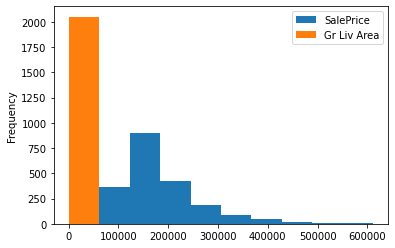

In [14]:
plt.rcParams["figure.figsize"] = (10,8)
train[['SalePrice','Gr Liv Area']].plot(kind='hist')